# **Child Mind Institute — Problematic Internet Use**

En la era digital actual, el uso problemático de internet entre niños y adolescentes es una preocupación creciente. Comprender mejor este problema es crucial para abordar problemas de salud mental como la depresión y la ansiedad.

Los métodos actuales para medir el uso problemático de internet en niños y adolescentes suelen ser complejos y requieren evaluaciones profesionales. Esto crea barreras de acceso, culturales y lingüísticas para muchas familias. Debido a estas limitaciones, el uso problemático de internet a menudo no se mide directamente, sino que se asocia con problemas como la depresión y la ansiedad en los jóvenes.

Por el contrario, las mediciones de condición física son extremadamente accesibles y están ampliamente disponibles con una intervención mínima o sin necesidad de experiencia clínica. Los cambios en los hábitos físicos, como una peor postura, una dieta irregular y una actividad física reducida, son comunes en los usuarios excesivos de tecnología. Proponemos usar estos indicadores de condición física, que son fáciles de obtener, como proxies para identificar el uso problemático de internet, especialmente en contextos donde falta experiencia clínica o herramientas de evaluación adecuadas.

El objetivo es desarrollar un modelo predictivo capaz de analizar datos de actividad física de los niños para detectar indicadores tempranos de uso problemático de internet y tecnología. Esto permitirá intervenciones tempranas destinadas a promover hábitos digitales más saludables.

In [258]:
# # Clone the repository to get data
# !git clone https://github.com/amadorssa/ChildInternetUseAnalysis.git

# !ls ChildInternetUseAnalysis/data/

In [259]:
import pandas as pd

In [260]:
# train_df = pd.read_csv('ChildInternetUseAnalysis/data/train.csv')
# test_df = pd.read_csv('ChildInternetUseAnalysis/data/test.csv')

In [261]:
train_df = pd.read_csv('data/train.csv', index_col=0)
test_df = pd.read_csv('data/test.csv', index_col=0)
dictionary_df = pd.read_csv('data/data_dictionary.csv')

### 1. Análisis exploratorio sencillo de los datos (que datos tenemos, que tipo son los datos, si hay o no datos faltantes, si hay datos numéricos, que distribución tienen, y si hay cualitativos si son ordenados o no por ejemplo).


##### Analisis exploratorio de los datos

In [262]:
print(train_df.shape)
print(test_df.shape)

(3960, 81)
(20, 58)


In [263]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 00008ff9 to 00ebc35d
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               20 non-null     object 
 1   Basic_Demos-Age                         20 non-null     int64  
 2   Basic_Demos-Sex                         20 non-null     int64  
 3   CGAS-Season                             10 non-null     object 
 4   CGAS-CGAS_Score                         8 non-null      float64
 5   Physical-Season                         14 non-null     object 
 6   Physical-BMI                            13 non-null     float64
 7   Physical-Height                         13 non-null     float64
 8   Physical-Weight                         13 non-null     float64
 9   Physical-Waist_Circumference            5 non-null      float64
 10  Physical-Diastolic_BP                   11 non-null     

In [264]:
display(train_df.head())

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
# Resumen general de los datos de entrenamiento
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3960 entries, 00008ff9 to ffef538e
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               3960 non-null   object 
 1   Basic_Demos-Age                         3960 non-null   int64  
 2   Basic_Demos-Sex                         3960 non-null   int64  
 3   CGAS-Season                             2555 non-null   object 
 4   CGAS-CGAS_Score                         2421 non-null   float64
 5   Physical-Season                         3310 non-null   object 
 6   Physical-BMI                            3022 non-null   float64
 7   Physical-Height                         3027 non-null   float64
 8   Physical-Weight                         3076 non-null   float64
 9   Physical-Waist_Circumference            898 non-null    float64
 10  Physical-Diastolic_BP                   2954 non-null 

In [266]:
dictionary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Instrument    81 non-null     object
 1   Field         81 non-null     object
 2   Description   81 non-null     object
 3   Type          81 non-null     object
 4   Values        42 non-null     object
 5   Value Labels  32 non-null     object
dtypes: object(6)
memory usage: 3.9+ KB


In [267]:
# Obtener una lista con las filas de la columna 'Field' de dictionary_df que que tienen str en la columna 'Type'
str_df = dictionary_df[dictionary_df['Type'] == 'str'][['Field', 'Values']]

display(str_df)

# Crear un array con los valores únicos de la columna 'Values' de str_df
str_columns = str_df['Field']

# Imprimir los valores únicos de la columna 'Value Labels' de str_df
print(str_df['Values'].unique())

,Field,Values
0,id,NaN
1,Basic_Demos-Enroll_Season,"Spring, Summer, Fall, Winter"
4,CGAS-Season,"Spring, Summer, Fall, Winter"
6,Physical-Season,"Spring, Summer, Fall, Winter"
14,Fitness_Endurance-Season,"Spring, Summer, Fall, Winter"
18,FGC-Season,"Spring, Summer, Fall, Winter"
33,BIA-Season,"Spring, Summer, Fall, Winter"
50,PAQ_A-Season,"Spring, Summer, Fall, Winter"
52,PAQ_C-Season,"Spring, Summer, Fall, Winter"
54,PCIAT-Season,"Spring, Summer, Fall, Winter"


[nan 'Spring, Summer, Fall, Winter']


In [268]:
# Eliminar la primera fila de str_df
str_df = str_df.drop(index=0)

In [269]:
# Obtener una array con las filas de la columna 'Field' de dictionary_df que que tienen str en la columna 'Type'
categorical_df = dictionary_df[dictionary_df['Type'] == 'categorical int'][['Field', 'Value Labels']]

display(categorical_df)

,Field,Value Labels
3,Basic_Demos-Sex,"0=Male, 1=Female"
20,FGC-FGC_CU_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
22,FGC-FGC_GSND_Zone,"1=Weak, 2=Normal, 3=Strong"
24,FGC-FGC_GSD_Zone,"1=Weak, 2=Normal, 3=Strong"
26,FGC-FGC_PU_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
28,FGC-FGC_SRL_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
30,FGC-FGC_SRR_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
32,FGC-FGC_TL_Zone,"0=Needs Improvement, 1=Healthy Fitness Zone"
34,BIA-BIA_Activity_Level_num,"1=Very Light, 2=Light, 3=Moderate, 4=Heavy, 5=..."
44,BIA-BIA_Frame_num,"1=Small, 2=Medium, 3=Large"


##### Manejar valores faltantes

In [270]:
# Eliminar filas con valores faltantes en la columna 'sii' de train_df y test_df
train_df = train_df.dropna(subset=['sii'])

In [271]:
# Valores faltantes
missing_values = train_df.isnull().mean()*100
missing_values = missing_values[missing_values > 35]

# Crear dataframe con los valores faltantes
missing_values_df = pd.DataFrame({'Variable': missing_values.index, 'Porcentaje': missing_values.values})

display(missing_values_df)

,Variable,Porcentaje
0,Physical-Waist_Circumference,82.346491
1,Fitness_Endurance-Season,53.947368
2,Fitness_Endurance-Max_Stage,73.282164
3,Fitness_Endurance-Time_Mins,73.391813
4,Fitness_Endurance-Time_Sec,73.391813
5,FGC-FGC_GSND,68.128655
6,FGC-FGC_GSND_Zone,68.421053
7,FGC-FGC_GSD,68.165205
8,FGC-FGC_GSD_Zone,68.421053
9,PAQ_A-Season,86.732456


In [272]:
# Eliminar columnas con más del 35% de valores faltantes
train_df = train_df.drop(columns=missing_values_df['Variable'])

In [273]:
# Valores faltantes
values = train_df.isnull().mean()*100
values = values[values < 35]
values = values[values > 10]

# Crear dataframe con los valores faltantes
values_df = pd.DataFrame({'Variable': values.index, 'Porcentaje': values.values})

display(values_df)

,Variable,Porcentaje
0,CGAS-Season,14.400585
1,CGAS-CGAS_Score,14.400585
2,FGC-FGC_CU,29.861111
3,FGC-FGC_CU_Zone,31.140351
4,FGC-FGC_PU,30.226608
5,FGC-FGC_PU_Zone,31.469298
6,FGC-FGC_SRL,30.153509
7,FGC-FGC_SRL_Zone,31.396199
8,FGC-FGC_SRR,30.080409
9,FGC-FGC_SRR_Zone,31.323099


In [274]:
# Eliminar filas con valoriables eliminadas en el paso anterior en los dataframes str_df y categorical_df
str_df = str_df[~str_df['Field'].isin(missing_values_df['Variable'])]

categorical_df = categorical_df[~categorical_df['Field'].isin(missing_values_df['Variable'])]

##### Codificación de variables categóricas

In [275]:
from sklearn.preprocessing import LabelEncoder

In [276]:
# Inicializar el codificador
label_encoder = LabelEncoder()

# Variables binarias
binary_columns = ['Basic_Demos-Sex', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL_Zone']

# Aplicar Label Encoding
for col in binary_columns:
    if col in train_df.columns:
        train_df[col] = label_encoder.fit_transform(train_df[col])
for col in binary_columns:
    if col in test_df.columns:
        test_df[col] = label_encoder.transform(test_df[col])

# Verificar las primeras filas
display(train_df[binary_columns].head())

,Basic_Demos-Sex,FGC-FGC_CU_Zone,FGC-FGC_PU_Zone,FGC-FGC_SRL_Zone,FGC-FGC_SRR_Zone,FGC-FGC_TL_Zone
id,,,,,,
00008ff9,0,0,0,0,0,1
000fd460,0,0,0,1,1,0
00105258,1,1,1,1,1,0
00115b9f,0,1,0,0,0,1
001f3379,1,0,0,1,1,0


In [277]:
# Aplicar one-hot encoding con las columnas de srt_df
for col in str_columns:
    if col in train_df.columns:
        train_df = pd.get_dummies(train_df, columns=[col])

for col in str_columns:
    if col in test_df.columns:
        test_df = pd.get_dummies(test_df, columns=[col])

display(train_df.head())

display(test_df.head())

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PCIAT-Season_Summer,PCIAT-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,0.0,...,False,False,False,False,False,False,True,False,False,False
000fd460,9,0,NaN,14.035590,48.0,46.0,75.0,70.0,122.0,3.0,...,False,False,True,False,False,False,False,False,True,False
00105258,10,1,71.0,16.648696,56.5,75.6,65.0,94.0,117.0,20.0,...,False,False,True,False,False,False,False,False,True,False
00115b9f,9,0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,...,True,False,False,False,True,False,False,False,False,True
001f3379,13,1,50.0,22.279952,59.5,112.2,60.0,73.0,102.0,12.0,...,True,False,False,False,True,False,False,True,False,False


,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,...,False,False,True,False,False,False,False,False,True,False
00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,...,True,False,True,False,False,False,False,False,True,False
00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,...,False,True,False,False,True,False,False,False,False,True
0016bb22,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [278]:
multicategorical_columns = [
    'BIA-BIA_Activity_Level_num',
    'BIA-BIA_Frame_num', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03',
    'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07',
    'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11',
    'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15',
    'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19',
    'PCIAT-PCIAT_20', 'PreInt_EduHx-computerinternet_hoursday']

# Aplicar One-Hot Encoding para las variables con más de dos categorías
for col in multicategorical_columns:
    if col in train_df.columns:
        train_df = pd.get_dummies(train_df, columns=[col], drop_first=True)
    
for col in multicategorical_columns:
    if col in test_df.columns:
        test_df = pd.get_dummies(test_df, columns=[col], drop_first=True)

# Verificar las primeras filas después de One-Hot Encoding
display(train_df.head())

display(test_df.head())

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PCIAT-PCIAT_19_4.0,PCIAT-PCIAT_19_5.0,PCIAT-PCIAT_20_1.0,PCIAT-PCIAT_20_2.0,PCIAT-PCIAT_20_3.0,PCIAT-PCIAT_20_4.0,PCIAT-PCIAT_20_5.0,PreInt_EduHx-computerinternet_hoursday_1.0,PreInt_EduHx-computerinternet_hoursday_2.0,PreInt_EduHx-computerinternet_hoursday_3.0
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,0.0,...,False,False,False,False,False,True,False,False,False,True
000fd460,9,0,NaN,14.035590,48.0,46.0,75.0,70.0,122.0,3.0,...,False,False,False,False,False,False,False,False,False,False
00105258,10,1,71.0,16.648696,56.5,75.6,65.0,94.0,117.0,20.0,...,False,False,True,False,False,False,False,False,True,False
00115b9f,9,0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,...,True,False,True,False,False,False,False,False,False,False
001f3379,13,1,50.0,22.279952,59.5,112.2,60.0,73.0,102.0,12.0,...,False,False,True,False,False,False,False,False,False,False


,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter,BIA-BIA_Activity_Level_num_3.0,BIA-BIA_Activity_Level_num_5.0,BIA-BIA_Frame_num_2.0,PreInt_EduHx-computerinternet_hoursday_1.0,PreInt_EduHx-computerinternet_hoursday_2.0,PreInt_EduHx-computerinternet_hoursday_3.0
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,False,True
000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,...,False,False,True,False,False,False,False,False,False,False
00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,...,False,False,True,False,False,False,False,False,True,False
00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,...,False,False,False,True,True,False,True,False,False,False
0016bb22,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


##### Imputación de valores faltantes

In [279]:
# Identificar columnas numéricas
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
print("\nColumnas numéricas:")
print(numeric_cols)

# Identificar columnas categóricas
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("\nColumnas categóricas:")
print(categorical_cols)

print(train_df.dtypes)



Columnas numéricas:
Index(['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU',
       'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL',
       'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL',
       'FGC-FGC_TL_Zone', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR',
       'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI',
       'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM',
       'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PCIAT-PCIAT_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'sii'],
      dtype='object')

Columnas categóricas:
Index([], dtype='object')
Basic_Demos-Age                                 int64
Basic_Demos-Sex                                 int64
CGAS-CGAS_Score                               float64
Physical-BMI                                 

In [280]:
# Eliminar la columna 'sii' de las columnas numéricas
numeric_cols = numeric_cols.drop('sii')

# Imputar valores faltantes numéricos con la media
for col in numeric_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mean())
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].mean())

In [281]:
print(train_df[numeric_cols].isnull().sum())

Basic_Demos-Age          0
Basic_Demos-Sex          0
CGAS-CGAS_Score          0
Physical-BMI             0
Physical-Height          0
Physical-Weight          0
Physical-Diastolic_BP    0
Physical-HeartRate       0
Physical-Systolic_BP     0
FGC-FGC_CU               0
FGC-FGC_CU_Zone          0
FGC-FGC_PU               0
FGC-FGC_PU_Zone          0
FGC-FGC_SRL              0
FGC-FGC_SRL_Zone         0
FGC-FGC_SRR              0
FGC-FGC_SRR_Zone         0
FGC-FGC_TL               0
FGC-FGC_TL_Zone          0
BIA-BIA_BMC              0
BIA-BIA_BMI              0
BIA-BIA_BMR              0
BIA-BIA_DEE              0
BIA-BIA_ECW              0
BIA-BIA_FFM              0
BIA-BIA_FFMI             0
BIA-BIA_FMI              0
BIA-BIA_Fat              0
BIA-BIA_ICW              0
BIA-BIA_LDM              0
BIA-BIA_LST              0
BIA-BIA_SMM              0
BIA-BIA_TBW              0
PCIAT-PCIAT_Total        0
SDS-SDS_Total_Raw        0
SDS-SDS_Total_T          0
dtype: int64


In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

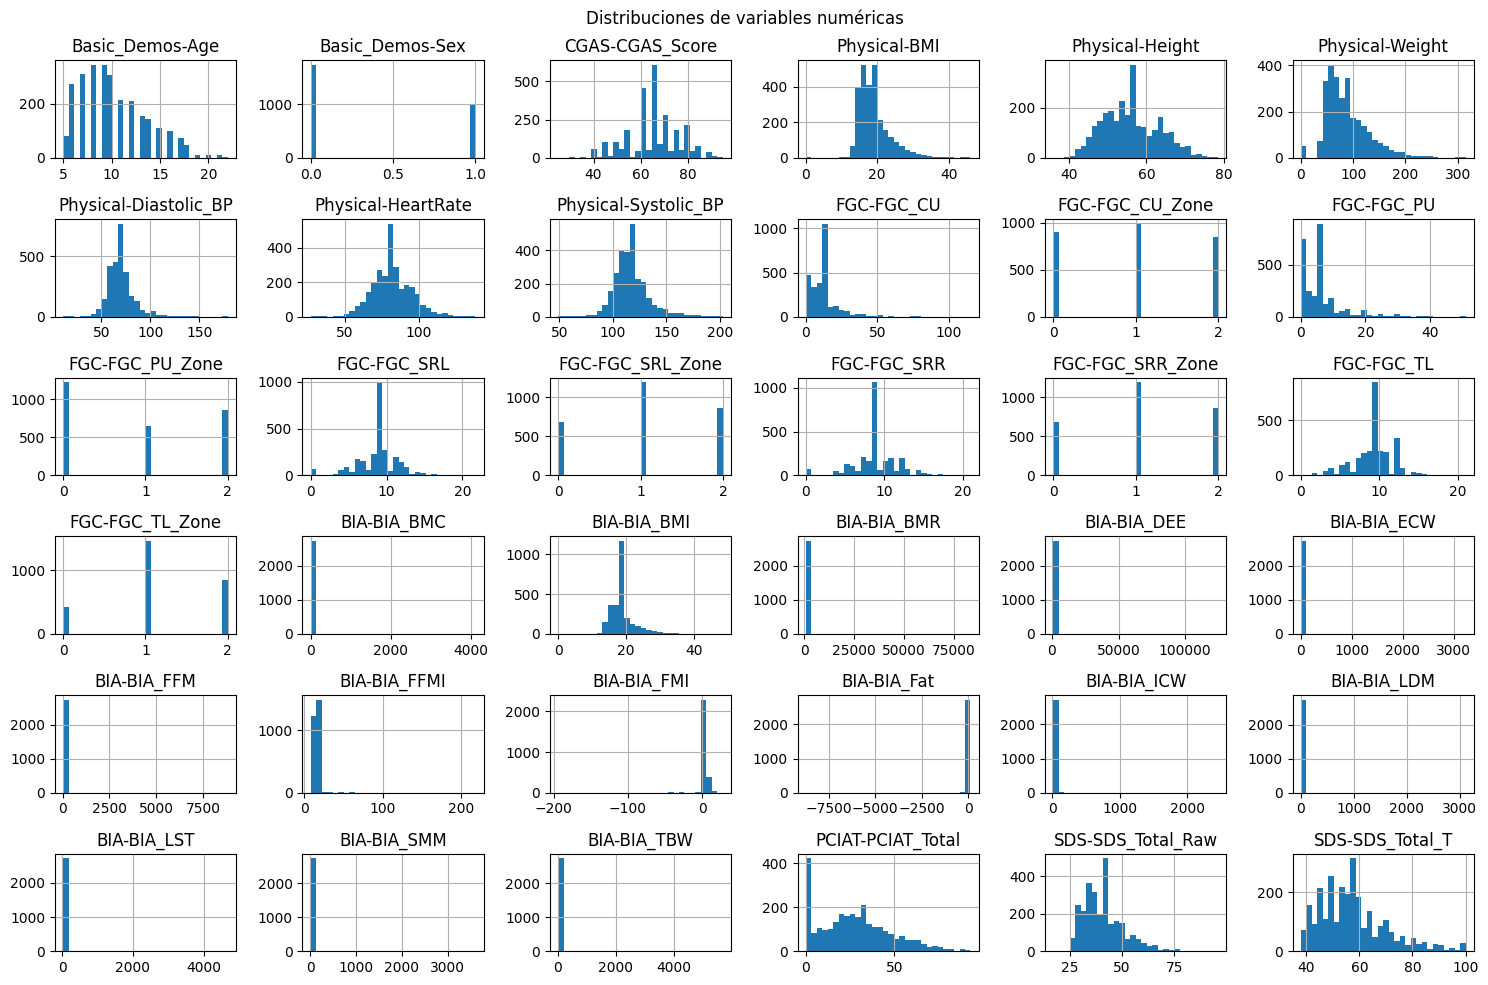

In [283]:
# Visualizar distribuciones de los datos numéricos
train_df[numeric_cols].hist(figsize=(15,10), bins=30)
plt.suptitle('Distribuciones de variables numéricas')
plt.tight_layout()
plt.show()

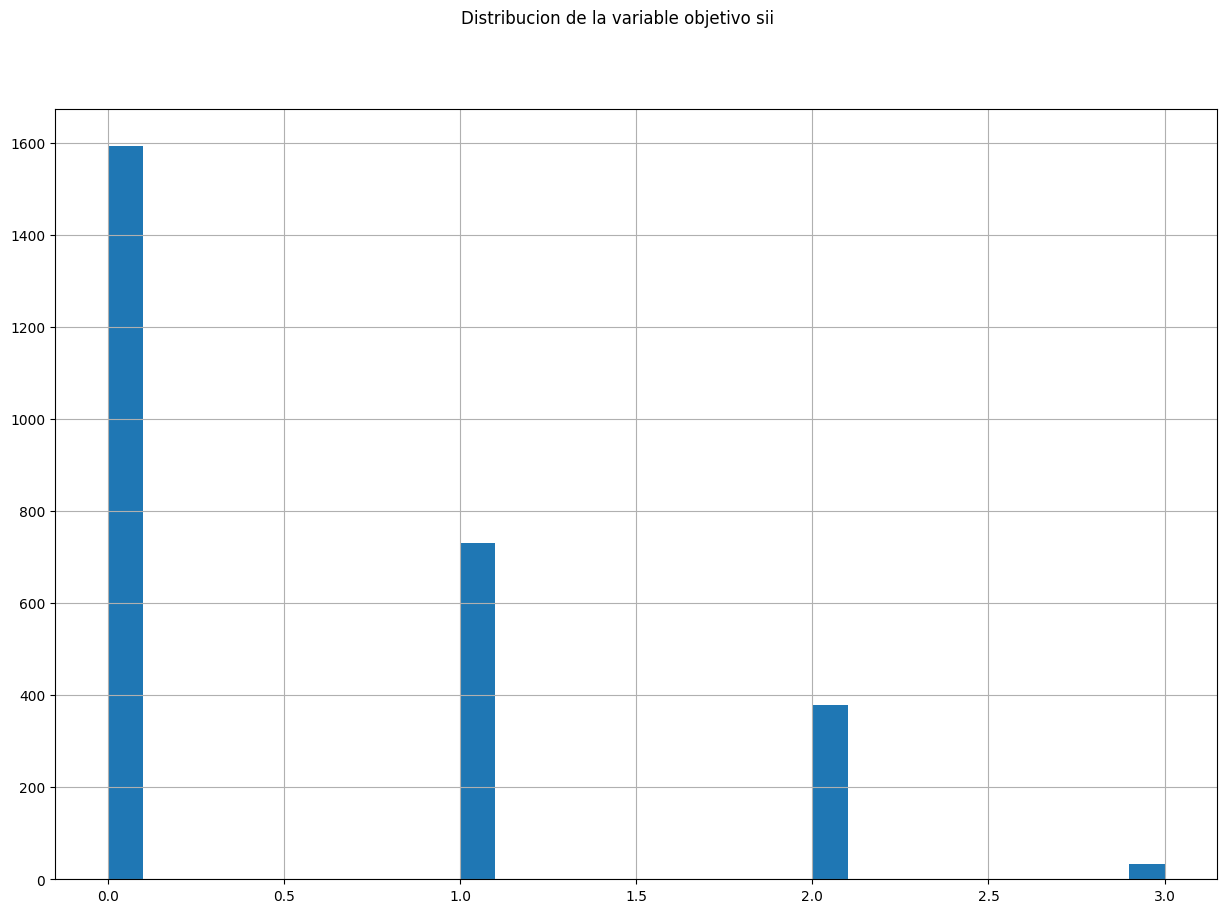

In [284]:
train_df['sii'].hist(figsize=(15,10), bins=30)
plt.suptitle('Distribucion de la variable objetivo sii')
plt.show()

##### Análisis de correlación

In [285]:
from sklearn.feature_selection import VarianceThreshold

In [286]:
# Eliminar características con varianza por debajo de un umbral (ej. 0.01)
selector = VarianceThreshold(threshold=0.01)
selector.fit(train_df.drop('sii', axis=1))
low_variance_features = train_df.drop('sii', axis=1).columns[~selector.get_support()]
train_df = train_df.drop(columns=low_variance_features)
print(f"Características eliminadas por baja varianza: {low_variance_features.tolist()}")

Características eliminadas por baja varianza: ['PCIAT-PCIAT_12_3.0', 'PCIAT-PCIAT_12_4.0', 'PCIAT-PCIAT_12_5.0']


In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
# Calcular la correlación de Pearson con SII
correlation_matrix = train_df.corr()

matrix = correlation_matrix['sii'].sort_values(ascending=False)

display(correlation_matrix['sii'].sort_values(ascending=False))

sii                   1.000000
PCIAT-PCIAT_Total     0.899681
PCIAT-PCIAT_05_5.0    0.558243
PCIAT-PCIAT_02_5.0    0.517706
PCIAT-PCIAT_03_5.0    0.500119
                        ...   
PCIAT-PCIAT_15_1.0   -0.211702
PCIAT-PCIAT_17_1.0   -0.212994
PCIAT-PCIAT_03_1.0   -0.241223
PCIAT-PCIAT_03_2.0   -0.247498
PCIAT-PCIAT_05_1.0   -0.267322
Name: sii, Length: 175, dtype: float64

In [289]:
# Calcular correlación con la variable objetivo
correlation_with_target = correlation_matrix['sii'].drop('sii')
low_corr_threshold = 0.1
low_corr_features = correlation_with_target[abs(correlation_with_target) < low_corr_threshold].index.tolist()

# Eliminar características con baja correlación
train_df = train_df.drop(columns=low_corr_features)
print(f"Características eliminadas por baja correlación con 'sii': {low_corr_features}")


Características eliminadas por baja correlación con 'sii': ['CGAS-CGAS_Score', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'Basic_Demos-Enroll_Season_Fall', 'Basic_Demos-Enroll_Season_Spring', 'Basic_Demos-Enroll_Season_Summer', 'Basic_Demos-Enroll_Season_Winter', 'CGAS-Season_Fall', 'CGAS-Season_Spring', 'CGAS-Season_Summer', 'CGAS-Season_Winter', 'Physical-Season_Fall', 'Physical-Season_Spring', 'Physical-Season_Summer', 'Physical-Season_Winter', 'FGC-Season_Fall', 'FGC-Season_Spring', 'FGC-Season_Summer', 'FGC-Season_Winter', 'BIA-Season_Fall', 'BIA-Season_Spring', 'BIA-Season_Summer', 'BIA-Season_Winter', 'PCIAT-Season_Fall', 'PCIAT-Season_Spring',

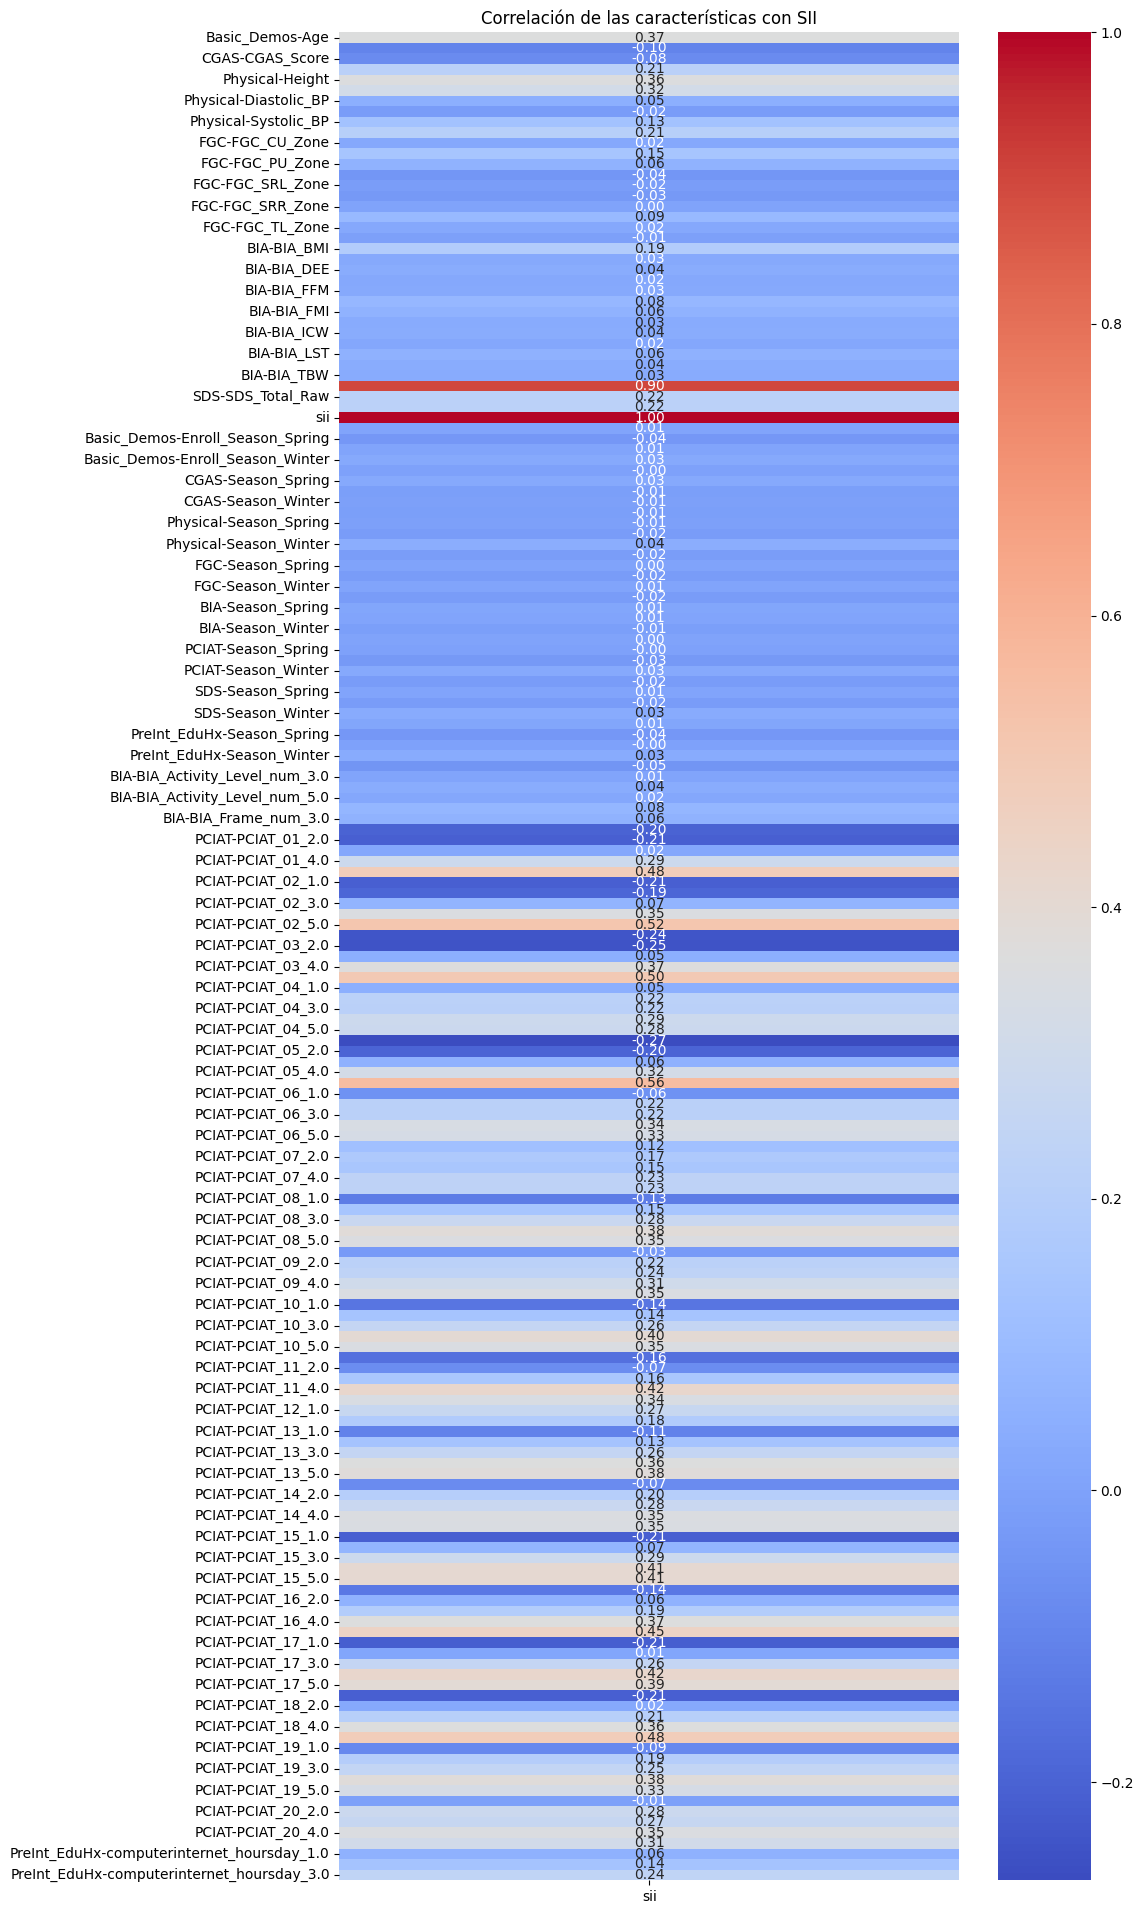

In [290]:
# Visualizar la correlación con SII
plt.figure(figsize=(10, 24))
sns.heatmap(correlation_matrix[['sii']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación de las características con SII')
plt.show()

In [291]:
# Encontrar pares de características altamente correlacionadas
high_corr_threshold = 0.8
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print(f"Pares de características con alta correlación (> {high_corr_threshold}):")

for pair in high_corr_pairs:
    print(f"({pair[0]}, {pair[1]})")


Pares de características con alta correlación (> 0.8):
(Physical-Height, Basic_Demos-Age)
(Physical-Weight, Physical-BMI)
(Physical-Weight, Physical-Height)
(FGC-FGC_PU_Zone, FGC-FGC_CU_Zone)
(FGC-FGC_SRR, FGC-FGC_SRL)
(FGC-FGC_SRR_Zone, FGC-FGC_SRL_Zone)
(BIA-BIA_BMI, Physical-BMI)
(BIA-BIA_BMR, BIA-BIA_BMC)
(BIA-BIA_DEE, BIA-BIA_BMC)
(BIA-BIA_DEE, BIA-BIA_BMR)
(BIA-BIA_ECW, BIA-BIA_BMC)
(BIA-BIA_ECW, BIA-BIA_BMR)
(BIA-BIA_ECW, BIA-BIA_DEE)
(BIA-BIA_FFM, BIA-BIA_BMC)
(BIA-BIA_FFM, BIA-BIA_BMR)
(BIA-BIA_FFM, BIA-BIA_DEE)
(BIA-BIA_FFM, BIA-BIA_ECW)
(BIA-BIA_Fat, BIA-BIA_BMC)
(BIA-BIA_Fat, BIA-BIA_BMR)
(BIA-BIA_Fat, BIA-BIA_DEE)
(BIA-BIA_Fat, BIA-BIA_ECW)
(BIA-BIA_Fat, BIA-BIA_FFM)
(BIA-BIA_ICW, BIA-BIA_BMC)
(BIA-BIA_ICW, BIA-BIA_BMR)
(BIA-BIA_ICW, BIA-BIA_DEE)
(BIA-BIA_ICW, BIA-BIA_ECW)
(BIA-BIA_ICW, BIA-BIA_FFM)
(BIA-BIA_ICW, BIA-BIA_Fat)
(BIA-BIA_LDM, BIA-BIA_BMC)
(BIA-BIA_LDM, BIA-BIA_BMR)
(BIA-BIA_LDM, BIA-BIA_DEE)
(BIA-BIA_LDM, BIA-BIA_ECW)
(BIA-BIA_LDM, BIA-BIA_FFM)
(BIA-BIA_LDM, 

#### 2. Implementar un método de reagrupamiento, o visualización con PCA o t-SNE de los datos de entrenamiento, que permita ver si hay ciertos patrones claros.

##### Normalización de datos

In [292]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Escalar los datos numéricos en train_df
for col in numeric_cols:
    if col in train_df.columns:
        train_df[col] = scaler.fit_transform(train_df[[col]])

# Escalar los datos numéricos en test_df
for col in numeric_cols:
    if col in test_df.columns:
        test_df[col] = scaler.transform(test_df[[col]])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Basic_Demos-Age
Feature names seen at fit time, yet now missing:
- SDS-SDS_Total_T


##### PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
# Preparar datos de entrenamiento
X_train = train_df.drop('sii', axis=1)
y_train = train_df['sii']

# Asegurar que las columnas de test_df coincidan con las de X_train
X_test_aligned = test_df.reindex(columns=X_train.columns, fill_value=0)


In [257]:
X_train

,Basic_Demos-Age,Basic_Demos-Sex,Physical-BMI,Physical-Height,Physical-Weight,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,BIA-BIA_BMI,PCIAT-PCIAT_Total,...,PCIAT-PCIAT_19_2.0,PCIAT-PCIAT_19_3.0,PCIAT-PCIAT_19_4.0,PCIAT-PCIAT_19_5.0,PCIAT-PCIAT_20_2.0,PCIAT-PCIAT_20_3.0,PCIAT-PCIAT_20_4.0,PCIAT-PCIAT_20_5.0,PreInt_EduHx-computerinternet_hoursday_2.0,PreInt_EduHx-computerinternet_hoursday_3.0
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,-1.528487,-0.757178,-0.476635,-1.392050,-0.881360,-8.672395e-16,-1.187686e+00,-0.930589,-0.587483,1.332856,...,True,False,False,False,False,False,True,False,False,True
000fd460,-0.361407,-0.757178,-1.079060,-1.110744,-0.995576,2.973259e-01,-8.885955e-01,-0.125944,-1.297037,-1.371823,...,False,False,False,False,False,False,False,False,False,False
00105258,-0.069637,1.320694,-0.525100,0.084807,-0.291242,-7.806868e-03,8.062508e-01,0.195913,0.000000,0.005105,...,False,False,False,False,False,False,False,False,True,False
00115b9f,-0.361407,-0.757178,-0.176658,0.014480,-0.148472,-7.806868e-03,6.068571e-01,-0.125944,-0.234191,0.791920,...,False,False,True,False,False,False,False,False,False,False
001f3379,0.805674,1.320694,0.668686,0.506766,0.579658,-9.232052e-01,8.676067e-03,0.034985,2.734796,0.300160,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff6c2bb8,-0.653177,-0.757178,-0.420988,-0.477806,-0.491121,-3.129396e-01,-1.187686e+00,-0.930589,-0.521947,-0.289951,...,True,False,False,False,False,False,False,False,True,False
ff759544,-0.944947,1.320694,-1.102080,-1.040418,-0.981299,-7.401255e-01,-1.187686e+00,-0.930589,-1.394753,0.250984,...,False,True,False,False,False,False,False,False,False,False
ff8a2de4,0.805674,-0.757178,-0.585780,0.506766,-0.129435,-8.011521e-01,4.074634e-01,0.678700,-0.716057,0.201808,...,False,False,False,False,False,False,False,False,False,False


In [256]:
X_test_aligned

,Basic_Demos-Age,Basic_Demos-Sex,Physical-BMI,Physical-Height,Physical-Weight,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_PU,BIA-BIA_BMI,PCIAT-PCIAT_Total,...,PCIAT-PCIAT_19_2.0,PCIAT-PCIAT_19_3.0,PCIAT-PCIAT_19_4.0,PCIAT-PCIAT_19_5.0,PCIAT-PCIAT_20_2.0,PCIAT-PCIAT_20_3.0,PCIAT-PCIAT_20_4.0,PCIAT-PCIAT_20_5.0,PreInt_EduHx-computerinternet_hoursday_2.0,PreInt_EduHx-computerinternet_hoursday_3.0
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,-4.202619,-4.601747,-3.254505,-0.929770,-0.546608,4.781387,-4.601747,-4.601747,-3.254355,0,...,0,0,0,0,0,0,0,0,False,True
000fd460,-3.883317,-4.601747,-3.481348,-0.770119,-0.929770,5.136973,-4.362270,-4.202619,-3.481227,0,...,0,0,0,0,0,0,0,0,False,False
00105258,-3.803491,-4.521921,-3.272755,-0.091602,1.433067,4.737845,-3.005235,-4.042968,-3.062328,0,...,0,0,0,0,0,0,0,0,True,False
00115b9f,-3.883317,-4.601747,-3.141550,-0.131515,1.912020,4.737845,-3.164886,-4.202619,-3.141394,0,...,0,0,0,0,0,0,0,0,False,False
0016bb22,-3.164886,-4.521921,-3.018332,-0.374062,1.720439,4.781387,-3.907878,-4.282444,-3.062328,0,...,0,0,0,0,0,0,0,0,False,False
001f3379,-3.564014,-4.521921,-2.823237,0.147875,4.354683,3.540462,-3.643840,-4.122793,-2.192092,0,...,0,0,0,0,0,0,0,0,False,False
0038ba98,-3.803491,-4.601747,-3.032315,-0.211340,2.151497,8.409822,-3.883317,-4.442096,-3.032144,0,...,0,0,0,0,0,0,0,0,False,True
0068a485,-3.803491,-4.521921,-3.255785,0.127919,2.119567,4.658020,-4.601747,-4.601747,-3.255640,0,...,0,0,0,0,0,0,0,0,True,False
0069fbed,-3.404363,-4.601747,-3.018332,-0.374062,1.720439,4.781387,-3.907878,-4.282444,-3.062328,0,...,0,0,0,0,0,0,0,0,True,False


In [255]:
# Aplicar PCA
n_components = 25
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(test_df)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_train_pca, columns=[f'PC{i}' for i in range(1, n_components+1)])
pca_df['SII'] = y_train.values

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BIA-BIA_Activity_Level_num_3.0
- BIA-BIA_Activity_Level_num_5.0
- BIA-BIA_BMC
- BIA-BIA_BMR
- BIA-BIA_DEE
- ...
Feature names seen at fit time, yet now missing:
- PCIAT-PCIAT_01_1.0
- PCIAT-PCIAT_01_2.0
- PCIAT-PCIAT_01_4.0
- PCIAT-PCIAT_01_5.0
- PCIAT-PCIAT_02_1.0
- ...


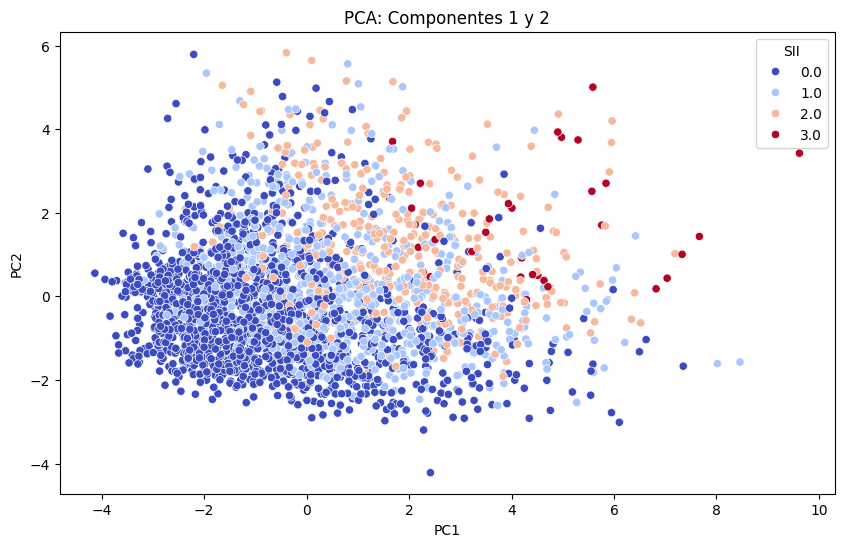

In [174]:
# Visualizar los resultados de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='SII', palette='coolwarm')
plt.title('PCA: Componentes 1 y 2')
plt.show()

In [175]:
# revisar la cantidad de varianza explicada por cada componente principal para entender qué tan bien representan los datos originales.
explained_variance_ratio = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(explained_variance_ratio)

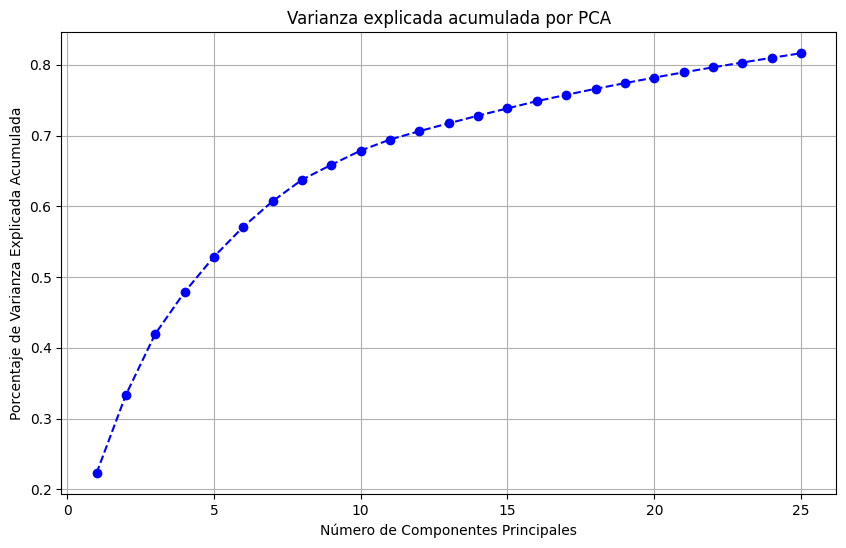

In [176]:
# Gráfica de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada Acumulada')
plt.grid()
plt.show()

In [179]:
# Imprimir varianza explicada por los primeros 10 componentes
for i, var in enumerate(explained_variance_ratio[:n_components], start=1):
    print(f"Varianza explicada por el Componente Principal {i}: {var:.2f}")
print(f"Varianza explicada acumulada por los 20 componentes: {varianza_acumulada[24]:.2f}")

Varianza explicada por el Componente Principal 1: 0.22
Varianza explicada por el Componente Principal 2: 0.11
Varianza explicada por el Componente Principal 3: 0.09
Varianza explicada por el Componente Principal 4: 0.06
Varianza explicada por el Componente Principal 5: 0.05
Varianza explicada por el Componente Principal 6: 0.04
Varianza explicada por el Componente Principal 7: 0.04
Varianza explicada por el Componente Principal 8: 0.03
Varianza explicada por el Componente Principal 9: 0.02
Varianza explicada por el Componente Principal 10: 0.02
Varianza explicada por el Componente Principal 11: 0.02
Varianza explicada por el Componente Principal 12: 0.01
Varianza explicada por el Componente Principal 13: 0.01
Varianza explicada por el Componente Principal 14: 0.01
Varianza explicada por el Componente Principal 15: 0.01
Varianza explicada por el Componente Principal 16: 0.01
Varianza explicada por el Componente Principal 17: 0.01
Varianza explicada por el Componente Principal 18: 0.01
V

##### t-SNE

In [107]:
from sklearn.manifold import TSNE

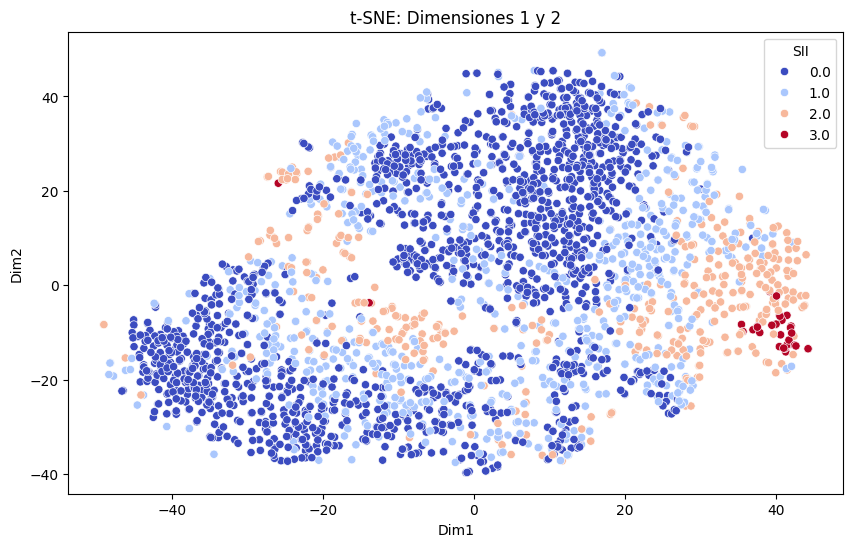

In [108]:
# Reduccion a n_components
n_components = 2

tsne = TSNE(n_components=n_components, random_state=42)
X_tsne = tsne.fit_transform(X_train)

tsne_df = pd.DataFrame(data=X_tsne, columns=[f'Dim{i}' for i in range(1, n_components+1)])
tsne_df['SII'] = y_train.values

# Visualizar los resultados de t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', data=tsne_df, hue='SII', palette='coolwarm')
plt.title('t-SNE: Dimensiones 1 y 2')
plt.show()

### 3. Preprocesamiento de los datos, y su codificación para usarlos como entrada a un modelo. Hay que tener en cuenta que este preprocesamiento debe poder integrarse mediante pipelines al modelo final.

##### Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [130]:
# Separar los datos en entrenamiento y validación para Random Forest
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de validación: {X_val.shape}")

Datos de entrenamiento: (1750, 96)
Datos de validación: (438, 96)


In [131]:
# Crear y entrenar el modelo de Random Forest (clasificación)
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [132]:
# Obtener las importancias de las características
importances = rf.feature_importances_
feature_names = train_df.drop('sii', axis=1).columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [133]:
# Obtener la importancia de las características
importances = rf.feature_importances_
feature_names = X_train.columns

In [134]:
# Ordenar las características por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Seleccionar las características más importantes (por ejemplo, las que tienen importancia > 0.01)
threshold = 0.01  # Ajusta este valor según tus necesidades
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature'].values
print(f"Número de características seleccionadas: {len(selected_features)}")

# Imprimir las caracteristicas seleccionadas
print(train_df[selected_features].shape)

Número de características seleccionadas: 27
(2736, 27)


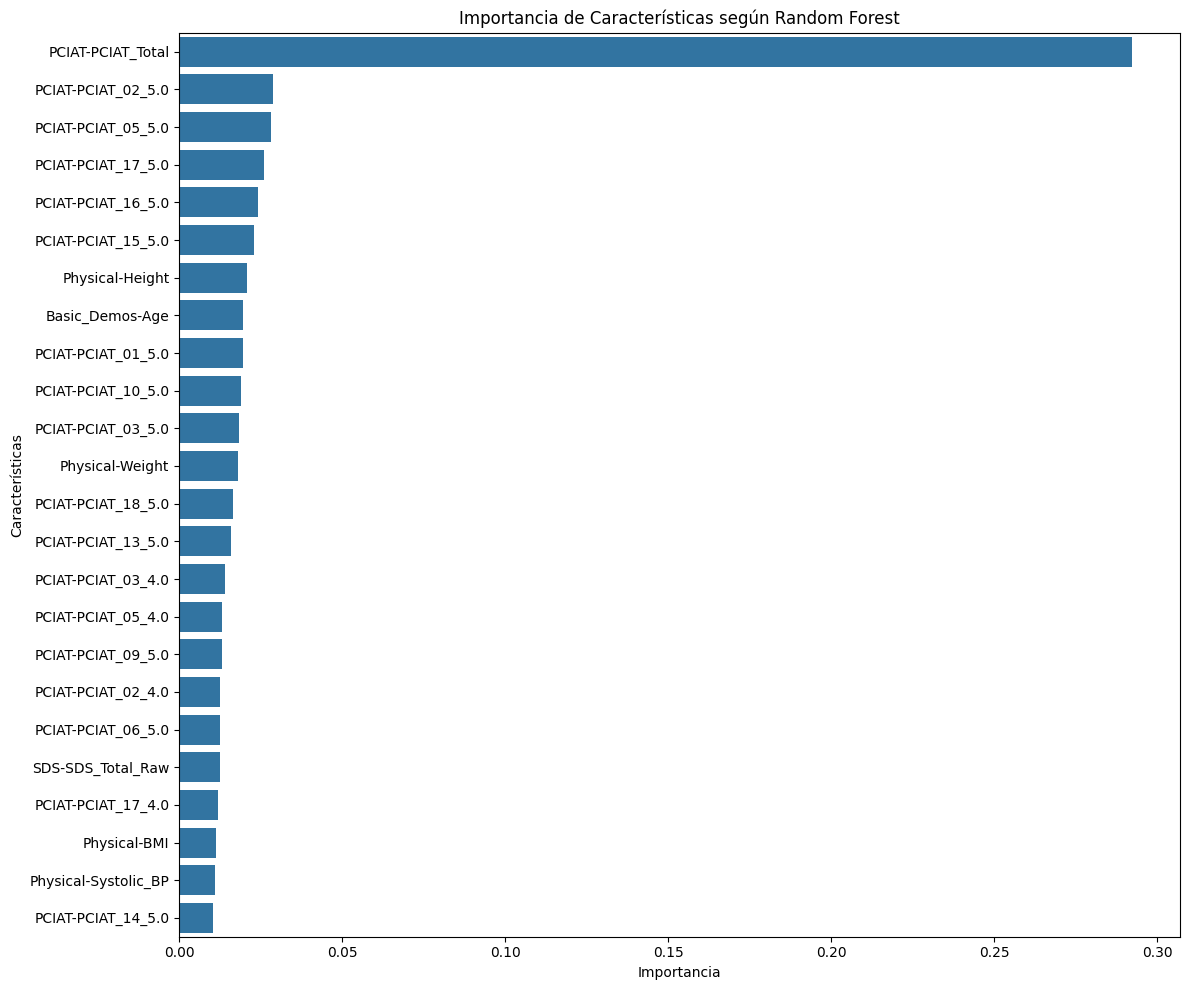

In [135]:
# Mostrar las 20 características más importantes
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(24))
plt.title('Importancia de Características según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

### 4. Decidir si es un problema de clasificación o de regresión (ambos podrían aplicar) y justificar porqué.

Este problema puede abordarse tanto como un problema de clasificación y como una problema de regresión, dependiendo del enfoque que se quiera tomar.
Si consideramos la variable objetivo `sii` (Severity Impairment Index) como categorías discretas ordenadas (0: ninguno, 1: leve, 2: moderado, 3: grave),
la clasificación es más adecuada, ya que respeta la naturaleza categórica de los datos y permite predecir directamente las clases con modelos como
Random Forest o XGBoost, evitando valores intermedios no válidos. Sin embargo, también podría tratarse como un problema de regresión debido a que los valores
son numéricos y tienen un orden. En este caso, modelos como regresión lineal, árboles de decisión para regresión, Random Forest Regressor,
Gradient Boosting Regressor (XGBoost, LightGBM) o redes neuronales podrían ser aplicados. Pero tenemos que tener en cuentas que las predicciones continuas
requerirían redondeo a los valores válidos (0, 1, 2, 3), lo que podría introducir errores adicionales. En general, la clasificación es preferible porque refleja
mejor el significado de las clases, aunque la regresión podría ser útil en análisis específicos donde se busquen tendencias más continuas en la severidad.

### 5. Utilizar un modelo inicial simple que permita establecer un baseline del problema.

In [116]:
# X_train = X_train[selected_features]
# X_val = X_val[selected_features]


In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2188 entries, 4fd7e043 to b9d3616c
Data columns (total 96 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Basic_Demos-Age                             2188 non-null   float64
 1   Basic_Demos-Sex                             2188 non-null   float64
 2   Physical-BMI                                2188 non-null   float64
 3   Physical-Height                             2188 non-null   float64
 4   Physical-Weight                             2188 non-null   float64
 5   Physical-Systolic_BP                        2188 non-null   float64
 6   FGC-FGC_CU                                  2188 non-null   float64
 7   FGC-FGC_PU                                  2188 non-null   float64
 8   BIA-BIA_BMI                                 2188 non-null   float64
 9   PCIAT-PCIAT_Total                           2188 non-null   float64
 10  SDS-SD

In [118]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 00008ff9 to 00ebc35d
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Basic_Demos-Age                             20 non-null     float64
 1   Basic_Demos-Sex                             20 non-null     float64
 2   CGAS-CGAS_Score                             20 non-null     float64
 3   Physical-BMI                                20 non-null     float64
 4   Physical-Height                             20 non-null     float64
 5   Physical-Weight                             20 non-null     float64
 6   Physical-Waist_Circumference                5 non-null      float64
 7   Physical-Diastolic_BP                       20 non-null     float64
 8   Physical-HeartRate                          20 non-null     float64
 9   Physical-Systolic_BP                        20 non-null     float64
 10  Fitness_

In [ ]:
# # Comparar columnas de X_train y test_df
# missing_in_test = [col for col in X_train.columns if col not in test_df.columns]

# print("Faltan en test_df:", missing_in_test)


Faltan en test_df: ['PCIAT-PCIAT_Total', 'PCIAT-PCIAT_01_1.0', 'PCIAT-PCIAT_01_2.0', 'PCIAT-PCIAT_01_4.0', 'PCIAT-PCIAT_01_5.0', 'PCIAT-PCIAT_02_1.0', 'PCIAT-PCIAT_02_2.0', 'PCIAT-PCIAT_02_4.0', 'PCIAT-PCIAT_02_5.0', 'PCIAT-PCIAT_03_1.0', 'PCIAT-PCIAT_03_2.0', 'PCIAT-PCIAT_03_4.0', 'PCIAT-PCIAT_03_5.0', 'PCIAT-PCIAT_04_2.0', 'PCIAT-PCIAT_04_3.0', 'PCIAT-PCIAT_04_4.0', 'PCIAT-PCIAT_04_5.0', 'PCIAT-PCIAT_05_1.0', 'PCIAT-PCIAT_05_2.0', 'PCIAT-PCIAT_05_4.0', 'PCIAT-PCIAT_05_5.0', 'PCIAT-PCIAT_06_2.0', 'PCIAT-PCIAT_06_3.0', 'PCIAT-PCIAT_06_4.0', 'PCIAT-PCIAT_06_5.0', 'PCIAT-PCIAT_07_1.0', 'PCIAT-PCIAT_07_2.0', 'PCIAT-PCIAT_07_3.0', 'PCIAT-PCIAT_07_4.0', 'PCIAT-PCIAT_07_5.0', 'PCIAT-PCIAT_08_1.0', 'PCIAT-PCIAT_08_2.0', 'PCIAT-PCIAT_08_3.0', 'PCIAT-PCIAT_08_4.0', 'PCIAT-PCIAT_08_5.0', 'PCIAT-PCIAT_09_2.0', 'PCIAT-PCIAT_09_3.0', 'PCIAT-PCIAT_09_4.0', 'PCIAT-PCIAT_09_5.0', 'PCIAT-PCIAT_10_1.0', 'PCIAT-PCIAT_10_2.0', 'PCIAT-PCIAT_10_3.0', 'PCIAT-PCIAT_10_4.0', 'PCIAT-PCIAT_10_5.0', 'PCIAT-PCIAT_

In [ ]:
# # Añade columnas faltantes a test_df con valores por defecto
# for col in missing_in_test:
#     test_df[col] = None

/var/folders/ts/h3g_x54d6lz74cd_jpc4phn80000gn/T/ipykernel_16773/4166676283.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = None
/var/folders/ts/h3g_x54d6lz74cd_jpc4phn80000gn/T/ipykernel_16773/4166676283.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[col] = None
/var/folders/ts/h3g_x54d6lz74cd_jpc4phn80000gn/T/ipykernel_16773/4166676283.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

In [121]:
# test = test_df[selected_features]


In [122]:
# X_train

In [123]:
# test_df[selected_features]

In [124]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Identificar las características categóricas para CatBoost
categorical_features = [
    train_df.columns.get_loc(col) 
    for col in categorical_cols 
    if col in train_df.columns
]

# Crear y configurar el modelo de CatBoost
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    cat_features=categorical_features,  # Nombres de las columnas categóricas
    verbose=100,
    random_seed=42
)

# Entrenar el modelo
catboost_model.fit(X_pca, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

# Predecir en los datos de validación
y_pred = catboost_model.predict(X_val)

# Mostrar métricas de evaluación
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


0:	learn: 0.9657221	test: 0.9580292	best: 0.9580292 (0)	total: 12.9ms	remaining: 12.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9872262774
bestIteration = 3

Shrink model to first 4 iterations.
Accuracy: 0.9872262773722628

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       319
         1.0       1.00      1.00      1.00       146
         2.0       0.92      1.00      0.96        76
         3.0       0.00      0.00      0.00         7

    accuracy                           0.99       548
   macro avg       0.73      0.75      0.74       548
weighted avg       0.98      0.99      0.98       548



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Transfer Learning a un modelo con caracteristicas disponibles en test_df

In [ ]:
# # Filtrar las caracteristicas de X_train disponibles en test_df para mantener solo las características comunes
# common_features = [col for col in X_train.columns if col in test_df.columns]

# X_train_common = X_train[common_features]
# X_val_common = X_val[common_features]

In [ ]:
# # Entrenar el modelo con transfer learning y las características comunes
# catboost_model.fit(X_train_common, y_train, eval_set=(X_val_common, y_val), early_stopping_rounds=50)


In [ ]:
# print("Dimensiones del conjunto de prueba:", test_df.shape)

# print(test_df.info())



Dimensiones del conjunto de prueba: (20, 169)
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 00008ff9 to 00ebc35d
Columns: 169 entries, Basic_Demos-Age to PCIAT-PCIAT_20_5.0
dtypes: bool(41), float64(45), object(83)
memory usage: 21.5+ KB
None


In [127]:
# Realizar predicciones
test_predictions = catboost_model.predict(test_df)

# Convertir predicciones a un formato adecuado
test_predictions = test_predictions.flatten()

# Crear un DataFrame con las predicciones y los IDs correspondientes
output_df = pd.DataFrame({
    'id': test_df.index,  # Usar el índice como ID
    'sii_predicted': test_predictions
})

In [128]:
output_df

,id,sii_predicted
0,00008ff9,0.0
1,000fd460,0.0
2,00105258,0.0
3,00115b9f,0.0
4,0016bb22,0.0
5,001f3379,0.0
6,0038ba98,0.0
7,0068a485,0.0
8,0069fbed,0.0
9,0083e397,0.0


In [ ]:
# Exportar a un archivo CSV
output_file_path = 'submission.csv'
output_df.to_csv(output_file_path, index=False)

### 6. Usar algún método de búsqueda de hiperparámetros y seleccionar el modelo de aprendizaje que consideres más adecuado. Justificar la selección.

##### KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir el modelo KNN
knn = KNeighborsClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9],         # Número de vecinos
    'weights': ['uniform', 'distance'], # Pesos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métrica
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo usando búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Resultados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Precisión del mejor modelo: {grid_search.best_score_:.4f}")


### 7. Revisar y mostrar la calidad del modelo retenido usando métodos (los que consideren mejor adaptados) como k-cross-fold-validation, curvas de aprendizaje, curvas RoC, matrices de confusión o métricas de entrenamiento y validación.


In [ ]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Evaluar el modelo KNN optimizado usando k-Fold Cross-Validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

# Imprimir resultados
print(f"Puntuaciones de validación cruzada: {cv_scores}")
print(f"Precisión promedio (cross-validation): {np.mean(cv_scores):.4f}")

# Predicciones en el conjunto de validación
y_val_pred = grid_search.best_estimator_.predict(X_val)

# Matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Obtener etiquetas únicas de las clases
class_labels = sorted(y_train.unique())

# Mostrar matriz de confusión con etiquetas específicas
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

# Binarizar etiquetas para usar ROC
y_train_binarized = label_binarize(y_train, classes=class_labels)
y_val_binarized = label_binarize(y_val, classes=class_labels)

# Predecir probabilidades
y_val_proba = grid_search.best_estimator_.predict_proba(X_val)

# Curvas ROC para cada clase
plt.figure(figsize=(10, 6))
for i, label in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_val_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {label} (AUC = {roc_auc:.2f})')

# Configurar la gráfica
plt.plot([0, 1], [0, 1], 'k--')  # Línea base
plt.title('Curvas ROC para cada clase')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Calcular curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    grid_search.best_estimator_,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Promedios y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Gráfica de curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Precisión en entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, val_mean, label='Precisión en validación')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)

plt.title('Curvas de aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()